In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

In [187]:
data=pd.read_csv('/Users/nuevomac/Downloads/ft_crm_ticket.csv', sep=';')
data.head(10)

,CustNro,CustNro2,Date,Cant,Importe
0,1,1,19990914,1,98.1
1,1,1,19990914,1,34.8
2,1,1,19990914,1,194.0
3,1,1,19990921,1,179.0
4,1,1,19990928,1,8.0
5,1,1,19990928,1,29.0
6,1,1,19991026,1,190.0
7,1,1,19991026,1,28.5
8,1,1,19991026,1,243.0
9,1,1,19991104,1,288.0


In [188]:
data['Date'] = data['Date'].astype(str)
data['Month']=data['Date'].str[:6]
data['Month'] = data['Month'].astype(int)
data['Cant']= data['Cant'].astype(int)
data['importe']= data['Importe'].astype(float)

In [189]:
data.head(10)

,CustNro,CustNro2,Date,Cant,Importe,Month,importe
0,1,1,19990914,1,98.1,199909,98.1
1,1,1,19990914,1,34.8,199909,34.8
2,1,1,19990914,1,194.0,199909,194.0
3,1,1,19990921,1,179.0,199909,179.0
4,1,1,19990928,1,8.0,199909,8.0
5,1,1,19990928,1,29.0,199909,29.0
6,1,1,19991026,1,190.0,199910,190.0
7,1,1,19991026,1,28.5,199910,28.5
8,1,1,19991026,1,243.0,199910,243.0
9,1,1,19991104,1,288.0,199911,288.0


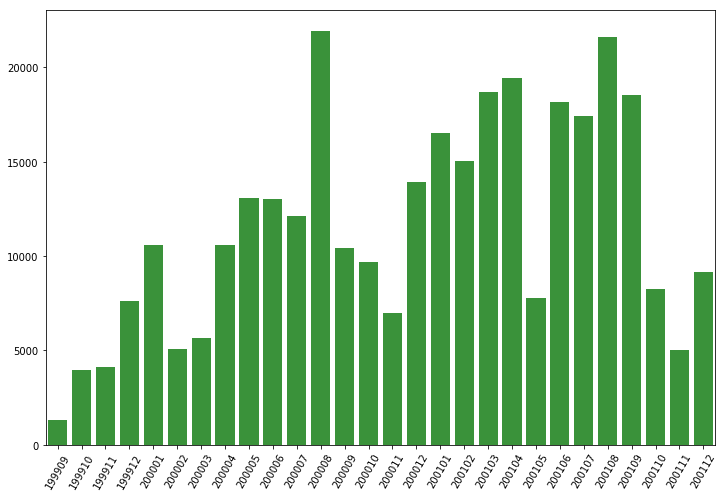

In [190]:
month_list = data['Month'].drop_duplicates()
trans_count = data.groupby(['Month']).count()

mes = list(month_list)
count = list(trans_count['Cant'])

#Plotting the count of transactions per month

plt.figure(figsize=(12,8))
sns.barplot(mes, count, alpha=1, color=color[2])
plt.xticks(rotation='60')
plt.show()

In [223]:
Cust_Month = data[['CustNro','Month']].drop_duplicates()

In [238]:
def f(row):
    if row['Month'] >= 200110:
        val = 5
    elif row['Month'] < 200110 and row['Month'] >= 200107:
        val = 4
    elif row['Month'] < 200107 and row['Month'] >= 200104:
        val = 3
    elif row['Month'] < 200104 and row['Month'] >= 200101:
        val = 2
    else:
        val = 1
    return val

Cust_Month['Recency_Flag'] = data.apply(f, axis=1)
Cust_Month = Cust_Month.groupby('CustNro')['Recency_Flag'].max()

AbstractMethodError: This method must be defined in the concrete class SeriesGroupBy

In [ ]:
Cust_Month.head(10)

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='Recency_Flag', data=Cust_Month, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Recency_Flag', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency of Recency_Flag', fontsize=15)
plt.show()

In [219]:
#Calculating the count of unique purchase for each customer

Cust_freq_count = data[['CustNro','Cant']].groupby(['CustNro']).count() 

unique_cant=Cust_freq_count[['Cant']].drop_duplicates()

unique_cant['Freqency_Band'] = pd.qcut(unique_cant['Cant'], 5)

unique_cant.head(10)


,Cant,Freqency_Band
CustNro,,
1,34,"(0.999, 53.0]"
2,3,"(0.999, 53.0]"
3,4,"(0.999, 53.0]"
4,353,"(231.0, 1724.0]"
6,42,"(0.999, 53.0]"
8,155,"(105.0, 159.0]"
10,1,"(0.999, 53.0]"
12,25,"(0.999, 53.0]"
13,62,"(53.0, 105.0]"


In [220]:
def f(row):
    
    if row['Cant'] <= 53:
        val = 1
    elif row['Cant'] > 53 and row['Cant'] <= 105:
        val = 2
    elif row['Cant'] > 105 and row['Cant'] <= 159:
        val = 3
    elif row['Cant'] > 159 and row['Cant'] <= 231:
        val = 4
    else:
        val = 5
    return val

Cust_freq_count['Freq_Flag'] = Cust_freq_count.apply(f, axis=1)

In [203]:
Cust_freq_count.head(10)

,Cant,Freq_Flag
CustNro,,
1,34,1
2,3,1
3,4,1
4,353,5
5,4,1
6,42,1
7,3,1
8,155,3
9,4,1


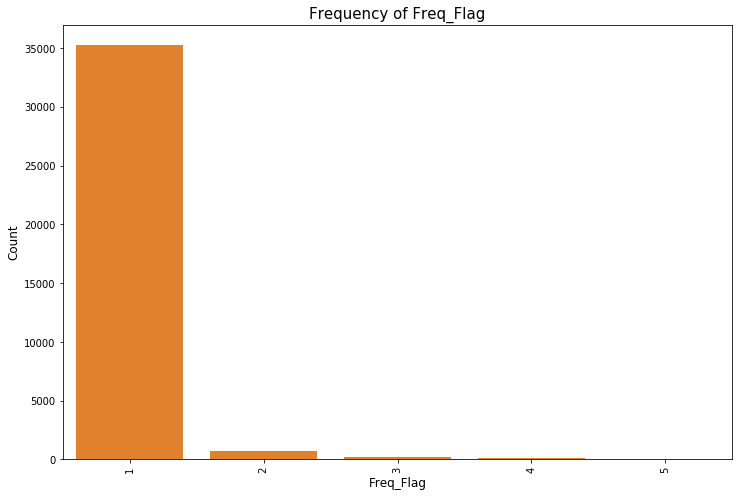

In [204]:
plt.figure(figsize=(12,8))
sns.countplot(x='Freq_Flag', data=Cust_freq_count, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Freq_Flag', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency of Freq_Flag', fontsize=15)
plt.show()

In [205]:
#Calculating the Sum of total monetary purchase for each customer

Cust_monetary = data[['CustNro','Importe']].groupby(['CustNro']).sum()
Cust_monetary.head(10)

,Importe
CustNro,
1,4967.70
2,665.29
3,337.00
4,12617.14
5,146.50
6,1788.80
7,530.00
8,7416.32
9,483.00


In [206]:
unique_price = Cust_monetary[['Importe']].drop_duplicates()
unique_price['monetary_Band'] = pd.qcut(unique_price['Importe'], 5)
unique_price=unique_price[['monetary_Band']].drop_duplicates()
unique_price.head

<bound method NDFrame.head of                monetary_Band
CustNro                     
1        (2226.296, 94884.0]
2         (624.424, 1155.08]
3          (280.64, 624.424]
5            (5.999, 280.64]
6        (1155.08, 2226.296]>

In [207]:
def f(row):
    if row['Importe'] <= 280:
        val = 1
    elif row['Importe'] > 280 and row['Importe'] <= 624:
        val = 2
    elif row['Importe'] > 624 and row['Importe'] <= 1155:
        val = 3
    elif row['Importe'] > 1155 and row['Importe'] <= 2226:
        val = 4
    else:
        val = 5
    return val

Cust_monetary['Monetary_Flag'] = Cust_monetary.apply(f, axis=1)    

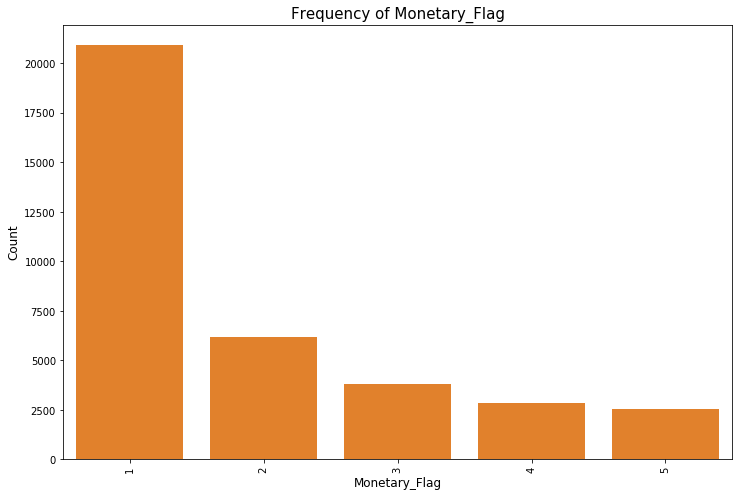

In [201]:
plt.figure(figsize=(12,8))
sns.countplot(x='Monetary_Flag', data=Cust_monetary, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Monetary_Flag', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency of Monetary_Flag', fontsize=15)
plt.show()

In [230]:
Cust_Month.set_index('CustNro',inplace=True)
Cust_freq_count.set_index('CustNro',inplace=True)

KeyError: 'CustNro'

In [231]:
Cust_All = pd.merge(Cust_Month,Cust_freq_count[['CustNro','Freq_Flag']])

#Cust_All= pd.merge(Cust_All,Cust_monetory[['CustNro','Monetary_Flag']])

Cust_All.head(10)

KeyError: "['CustNro'] not in index"